In [3]:
import torch
import torch.nn as nn
import numpy as np 

Firstly we'll see the inbuilt implementation of cross entropy 

In [4]:
loss = nn.CrossEntropyLoss()

In [6]:
# Example batch of 3 samples and 3 classes
logits = torch.tensor([
    [2.0, 0.5, 1.0],   # sample 0
    [0.2, 1.5, 0.3],   # sample 1
    [1.0, 2.0, 0.1]    # sample 2
])

# Correct classes for each sample
targets = torch.tensor([0, 1, 1], dtype=torch.long)

# Compute loss
loss = loss(logits, targets)
print("Cross Entropy Loss:", loss)


Cross Entropy Loss: tensor(0.4449)


Now we will see the implementation of it from scratch to get the same result

In [7]:
logits = torch.tensor([
    [2.0, 0.5, 1.0],   # sample 0
    [0.2, 1.5, 0.3],   # sample 1
    [1.0, 2.0, 0.1]    # sample 2
])

In [8]:
targets = torch.tensor([0, 1, 1], dtype=torch.int)

Now we need the max element from each batch and subtract the batch with that number 

for that we need the max of each batch while keeping the dimension as it is so subtraction will be as we desire

In [17]:
max_elements = logits.max(dim = 1, keepdim=True)
max_elements

torch.return_types.max(
values=tensor([[2.0000],
        [1.5000],
        [2.0000]]),
indices=tensor([[0],
        [1],
        [1]]))

In [18]:
max_elements = max_elements.values
max_elements

tensor([[2.0000],
        [1.5000],
        [2.0000]])

In [19]:
logits = logits - max_elements
logits

tensor([[ 0.0000, -1.5000, -1.0000],
        [-1.3000,  0.0000, -1.2000],
        [-1.0000,  0.0000, -1.9000]])

This is the simplified logits 

Now we need to find log(softmax(logits)) using modified formula :

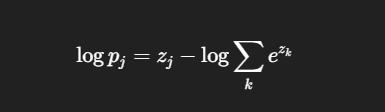

where this gives 3*3 matrix for each batch and each class

1) first do exponential to each element in logits 
2) find batch wise sum of each term ie summation(e^zk) preserving the dimension as we need to perform subtraction batch wise from logits(zj)

In [20]:
log_sum_exp = torch.log(torch.exp(logits).sum(dim = 1 , keepdim=True))
log_sum_exp

tensor([[0.4644],
        [0.4534],
        [0.4170]])

now subtract from logits

In [21]:
log_probs = logits - log_sum_exp
log_probs

tensor([[-0.4644, -1.9644, -1.4644],
        [-1.7534, -0.4534, -1.6534],
        [-1.4170, -0.4170, -2.3170]])

This gave the final log(softmax(logits)) 

To get the actual loss follow: 
1) extract the actual class probability from each batch 

for step 1 we'll use advanced indexing in tensor (also available in numpy)

Its a way to extract required elements from tensor by giving indexes from tensor 

in our case actual label is torch.tensor([0, 1, 1]) ie from first row first element , from second row 2nd element and from third row also 2nd element 

so advanced indexing helps us to get the required elements in one go here a tensor takes two arguments ie in first tensor which rows and in second tensor which columns elements 

for rows we need all rows ie logits.shape[0] = 3 in our case

lets define no of rows 

In [23]:
N = logits.shape[0] 
N

3

In [24]:
rows = torch.arange(N)
rows

tensor([0, 1, 2])

now for column we need exactly the column specified by final label ie 0,1,1

In [25]:
required_loss_in_batch = log_probs[rows,targets]
required_loss_in_batch

tensor([-0.4644, -0.4534, -0.4170])

This is the loss for each batch now we will apply mean operation to return final loss also add negative sign in front

In [27]:
loss = -required_loss_in_batch.mean()
loss

tensor(0.4449)

This is the exact same loss we got by inbuilt implementation 

Now to sum up in the function 

In [28]:
def cross_entropy_from_scratch(logits,targets):
    # logits : (N,C) ie (batch size , no of classes)
    # targets : (N,) long

    # 1) For numerical stability 
    logits = logits - logits.max(dim=1,keepdim=True).values #(N,c)

    #2) Log(softmax(logits))
    log_sum_exp = torch.log(torch.exp(logits).sum(dim = 1,keepdim=True)) #(N,1)
    log_probs = logits - log_sum_exp #(N,c)

    #3) Indexing 
    N = logits.shape[0]
    loss = -log_probs[torch.arange(N),targets].mean()

    return loss 


In [29]:
# Example batch of 3 samples and 3 classes
logits = torch.tensor([
    [2.0, 0.5, 1.0],   # sample 0
    [0.2, 1.5, 0.3],   # sample 1
    [1.0, 2.0, 0.1]    # sample 2
])

# Correct classes for each sample
targets = torch.tensor([0, 1, 1], dtype=torch.int)

# Compute loss
loss = cross_entropy_from_scratch(logits, targets)
print("Cross Entropy Loss:", loss)

Cross Entropy Loss: tensor(0.4449)
